# Kuntimala - YT93657

## Data acquisition and Problem statement

The following data represents the physical wellbeing, Mortality rates and Life expectancies of all the countries around the world in a span of 16 years. It also soecifies in the Life expectancies in all the countries over the years.

I wish to explore the data and analyze the progress of various diseases in all the countries over the years. And get a model which would find the relation between the diseases and other factors in the data and the Life expectancy in each Country.

ML helps fitting the various factors and the resulting Life Expentancy into a regression model so we can train test and predict the values, which helps a lot in the field of biomedical research and the governments in taking necessary measures in health care sector.

### Setting up the environment : import necessary modules

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from sklearn import linear_model  
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

This Data was published by the WHO(World Health Organization), to make a statistical Analysis on factors influencing Life Expectancy, over the period of 15 years. It is found in the following URL https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

There is no restriction for using this data in public environment and hence can be used to perform EDA and ML models.

As I wanted to explore datasets which would give me a better overview in the health care sector over the countries around the world and know about the factors influencing Life Expectancy, I chose this dataset.

## Description of the Dataset

This dataset contains 2938 rows and 22 columns which help describe the health conditions and distribution of various diseases around the world. The columns of this dataset include

**Country**: Country name<br>
**Year**: Year<br>
**Status**: Developed or Developing status<br>
**Life expectancy**: Life Expectancy in age<br>
**Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)<br>
**infant deaths**: Number of Infant Deaths per 1000 population<br>
**Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)<br>
**percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)<br>
**Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)<br>
**Measles**: Measles - number of reported cases per 1000 population<br>
**BMI**: Average Body Mass Index of entire population<br>
**under-five deaths**: Number of under-five deaths per 1000 population<br>
**Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)<br>
**Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)<br>
**Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)<br>
**HIV/AIDS**: Deaths per 1000 live births HIV/AIDS (0-4 years)<br>
**GDP**: Gross Domestic Product per capita (in USD)<br>
**Population**: Population of the country<br>
**thinness  1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )<br>
**thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)<br>
**Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)<br>
**Schooling**: Number of years of Schooling(years)<br>

Let us perform some Exploratory Data Analysis on the given Data.


## Inspecting the Dataset

In [2]:
#convert csv file to dataframe using pandas
df=pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
#statistical details of each column in the dataset
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [6]:
df.shape

(2938, 22)

The dataset has 2938 rows and 22 columns.

In [7]:
#all column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Data manipulation:

Initially, let's check for some null values present in the dataset

In [8]:
#Chcek for null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
#number of years each country has collected details for
df['Country'].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [10]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [11]:
df[df['Life expectancy '].isnull()]['Country']

624              Cook Islands
769                  Dominica
1650         Marshall Islands
1715                   Monaco
1812                    Nauru
1909                     Niue
1958                    Palau
2167    Saint Kitts and Nevis
2216               San Marino
2713                   Tuvalu
Name: Country, dtype: object

As we wish to predict the Life expectancy in our model, we can drop the rows where Life Expectancy is a null value

In [12]:
df.dropna(subset='Life expectancy ',inplace=True)

In [13]:
#null values for the Alcohol column by each country
df[df['Alcohol'].isnull()]['Country'].value_counts()

South Sudan    16
Montenegro      2
Algeria         1
Netherlands     1
Niger           1
               ..
Ghana           1
Greece          1
Grenada         1
Guatemala       1
Zimbabwe        1
Name: Country, Length: 177, dtype: int64

Any country if it has **16 null values** which is the maximum number of years data can be collected in the dataset, better leave those null values as we cannot fill them with any other appropriate figures


In [14]:
# the missing values can be replaced by mean value of that country
df['Alcohol'] = df.groupby(['Country']).Alcohol.apply(lambda x: x.fillna(x.mean()))

In [15]:
#null values for the Hepatitis B column by each country
df[df['Hepatitis B'].isnull()]['Country'].value_counts()

Denmark                                                 16
United Kingdom of Great Britain and Northern Ireland    16
Norway                                                  16
Japan                                                   16
Switzerland                                             16
                                                        ..
Grenada                                                  1
Mozambique                                               1
Antigua and Barbuda                                      1
Russian Federation                                       1
Panama                                                   1
Name: Country, Length: 98, dtype: int64

In [16]:
# the missing values can be replaced by mean value of that country
df['Hepatitis B'] = df.groupby(['Country'])['Hepatitis B'].apply(lambda x: x.fillna(x.mean()))

In [17]:
#null values for the BMI column by each country
df[df[' BMI '].isnull()]['Country'].value_counts()

South Sudan    16
Sudan          16
Name: Country, dtype: int64

In [18]:
#null values for the Polio column by each country
df[df['Polio'].isnull()]['Country'].value_counts()

South Sudan    11
Montenegro      6
Timor-Leste     2
Name: Country, dtype: int64

In [19]:
# the missing values can be replaced by mean value of that country
df['Polio'] = df.groupby(['Country']).Polio.apply(lambda x: x.fillna(x.mean()))

In [20]:
#null values for the Total expenditure column by each country
df[df['Total expenditure'].isnull()]['Country'].value_counts()

Somalia                                  16
Democratic People's Republic of Korea    16
South Sudan                              13
Iraq                                      4
Philippines                               1
                                         ..
Greece                                    1
Grenada                                   1
Guatemala                                 1
Guinea                                    1
Zimbabwe                                  1
Name: Country, Length: 181, dtype: int64

In [21]:
# the missing values can be replaced by mean value of that country
df['Total expenditure'] = df.groupby(['Country'])['Total expenditure'].apply(lambda x: x.fillna(x.mean()))

In [22]:
#null values for the Diphtheria column by each country
df[df['Diphtheria '].isnull()]['Country'].value_counts()

South Sudan    11
Montenegro      6
Timor-Leste     2
Name: Country, dtype: int64

In [23]:
# the missing values can be replaced by mean value of that country
df['Diphtheria '] = df.groupby(['Country'])['Diphtheria '].apply(lambda x: x.fillna(x.mean()))

In [24]:
#null values for the GDP column by each country
df[df['GDP'].isnull()]['Country'].value_counts()

Bahamas                                                 16
Micronesia (Federated States of)                        16
Viet Nam                                                16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
United Republic of Tanzania                             16
United Kingdom of Great Britain and Northern Ireland    16
The former Yugoslav republic of Macedonia               16
Slovakia                                                16
Saint Vincent and the Grenadines                        16
Saint Lucia                                             16
Republic of Moldova                                     16
Republic of Korea                                       16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Democratic People's Republic of Korea                   16
Kyrgyzstan                                              

In [25]:
# the missing values can be replaced by mean value of that country
df['GDP'] = df.groupby(['Country'])['GDP'].apply(lambda x: x.fillna(x.mean()))

In [26]:
#null values for the Population column by each country
df[df['Population'].isnull()]['Country'].value_counts()

Antigua and Barbuda                                     16
Micronesia (Federated States of)                        16
Oman                                                    16
Qatar                                                   16
Republic of Korea                                       16
Republic of Moldova                                     16
Saint Lucia                                             16
Saint Vincent and the Grenadines                        16
Saudi Arabia                                            16
Singapore                                               16
Slovakia                                                16
Somalia                                                 16
The former Yugoslav republic of Macedonia               16
United Arab Emirates                                    16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                

In [27]:
# the missing values can be replaced by mean value of that country
df['Population'] = df.groupby(['Country'])['Population'].apply(lambda x: x.fillna(x.mean()))

In [28]:
#null values for the thinness  1-19 years column by each country
df[df[' thinness  1-19 years'].isnull()]['Country'].value_counts()

South Sudan    16
Sudan          16
Name: Country, dtype: int64

In [29]:
#null values for the thinness 5-9 years column by each country
df[df[' thinness 5-9 years'].isnull()]['Country'].value_counts()

South Sudan    16
Sudan          16
Name: Country, dtype: int64

In [30]:
#null values for the Income composition of resources column by each country
df[df['Income composition of resources'].isnull()]['Country'].value_counts()

Côte d'Ivoire                                           16
Czechia                                                 16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: Country, dtype: int64

In [31]:
#null values for the Schooling column by each country
df[df['Schooling'].isnull()]['Country'].value_counts()

Côte d'Ivoire                                           16
Czechia                                                 16
Democratic People's Republic of Korea                   16
Democratic Republic of the Congo                        16
Republic of Korea                                       16
Republic of Moldova                                     16
Somalia                                                 16
United Kingdom of Great Britain and Northern Ireland    16
United Republic of Tanzania                             16
United States of America                                16
Name: Country, dtype: int64

In [32]:
#Checking for null values after sulling some null values with mean values of each country
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             16
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                400
Population                         640
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [33]:
#Changing the Status column by quantifying into binary values
df.loc[df['Status'] == 'Developed', 'Status'] = 1
df.loc[df['Status'] == 'Developing', 'Status'] = 0

In [34]:
df.rename(columns={'Status':'Developed/Developing'},inplace=True)

In [35]:
df

Country  Year Developed/Developing  Life expectancy   \
0     Afghanistan  2015                    0              65.0   
1     Afghanistan  2014                    0              59.9   
2     Afghanistan  2013                    0              59.9   
3     Afghanistan  2012                    0              59.5   
4     Afghanistan  2011                    0              59.2   
...           ...   ...                  ...               ...   
2933     Zimbabwe  2004                    0              44.3   
2934     Zimbabwe  2003                    0              44.5   
2935     Zimbabwe  2002                    0              44.8   
2936     Zimbabwe  2001                    0              45.3   
2937     Zimbabwe  2000                    0              46.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0               263.0             62     0.01               71.279624   
1               271.0             64     0.01               73.523582   
2               268.0             66     0.01               73.219243   
3               272.0             69     0.01               78.184215   
4               275.0             71     0.01                7.097109   
...               ...            ...      ...                     ...   
2933            723.0             27     4.36                0.000000   
2934            715.0             26     4.06                0.000000   
2935             73.0             25     4.43                0.000000   
2936            686.0             25     1.72                0.000000   
2937            665.0             24     1.68                0.000000   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
0            65.0      1154  ...    6.0               8.16         65.0   
1            62.0       492  ...   58.0               8.18         62.0   
2            64.0       430  ...   62.0               8.13         64.0   
3            67.0      2787  ...   67.0               8.52         67.0   
4            68.0      3013  ...   68.0               7.87         68.0   
...           ...       ...  ...    ...                ...          ...   
2933         68.0        31  ...   67.0               7.13         65.0   
2934          7.0       998  ...    7.0               6.52         68.0   
2935         73.0       304  ...   73.0               6.53         71.0   
2936         76.0       529  ...   76.0               6.16         75.0   
2937         79.0      1483  ...   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
0           0.1  584.259210  33736494.0                   17.2   
1           0.1  612.696514    327582.0                   17.5   
2           0.1  631.744976  31731688.0                   17.7   
3           0.1  669.959000   3696958.0                   17.9   
4           0.1   63.537231   2978599.0                   18.2   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
0                    17.3                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    18.0                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...        ...  
2933                  9.4                            0.407        9.2  
2934                  9.9                            0.418        9.5 

In [36]:
df[df['Life expectancy ']==df['Life expectancy '].max()]

Country  Year Developed/Developing  Life expectancy   \
241       Belgium  2014                    1              89.0   
915       Finland  2014                    0              89.0   
937        France  2008                    0              89.0   
938        France  2007                    0              89.0   
995       Germany  2014                    1              89.0   
1293        Italy  2004                    1              89.0   
1850  New Zealand  2010                    1              89.0   
1916       Norway  2009                    1              89.0   
2056     Portugal  2014                    1              89.0   
2433        Spain  2007                    1              89.0   
2513       Sweden  2007                    1              89.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
241              76.0              0    12.60             7163.348923   
915              78.0              0     8.80             6164.455402   
937              88.0              3    11.90             7002.785925   
938              89.0              3    12.20               64.737149   
995              69.0              2    11.03              941.756291   
1293             66.0              2     8.98             4270.914882   
1850             71.0              0     9.62             6664.148708   
1916             67.0              0     6.68              142.374943   
2056             78.0              0     9.88              271.254553   
2433             72.0              2    11.05              510.932701   
2513             63.0              0     6.90             7593.391622   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
241          98.0        70  ...   99.0               1.59         99.0   
915           NaN         0  ...   98.0               9.68         98.0   
937          47.0       604  ...   98.0               1.57         98.0   
938          42.0        39  ...   99.0               1.45         98.0   
995          88.0       443  ...   94.0              11.30         95.0   
1293         96.0       599  ...   97.0               8.49         94.0   
1850          9.0        43  ...   93.0              11.20         93.0   
1916          NaN         2  ...   94.0               9.49         94.0   
2056         98.0         0  ...   98.0               9.50         98.0   
2433         96.0       267  ...   96.0               8.36         96.0   
2513         59.2         1  ...   98.0               8.92         98.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
241         0.1  47439.39684    112957.0                    1.0   
915         0.1  49914.61864   5461512.0                    0.9   
937         0.1  45413.65710   6437499.0                    0.6   
938         0.1    416.58397   6416229.0                    0.6   
995         0.1   4792.65288     89825.0                    1.1   
1293        0.1  31174.56118  57685327.0                    0.5   
1850        0.1  33691.34837         NaN                    0.3   
1916        0.1    817.77681   4828726.0                    0.7   
2056        0.1   2277.53613     14162.0                    0.7   
2433        0.1   3279.41400   4522683.0                    0.6   
2513        0.1  53324.37937    914892.0                    1.3   

       thinness 5-9 years  Income composition of resources  Schooling  
241                   1.0                            0.890       16.3  
915                   0.8                            0.890       17.0  
937                   0.6                            0.877       16.1  
938                   0.6                            0.873       16.1  
995                   1.1                            0.920       17.0  
1293                  0.5                            0.846       15.6  
1850                  0.3                            0.899       20.3  
1916                  0.7                            0.936

Over the years there were 11 instances where the Life expectancy was 89 years which is the maximum Life expectancy in the given data.

## Removing outliers for vital columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


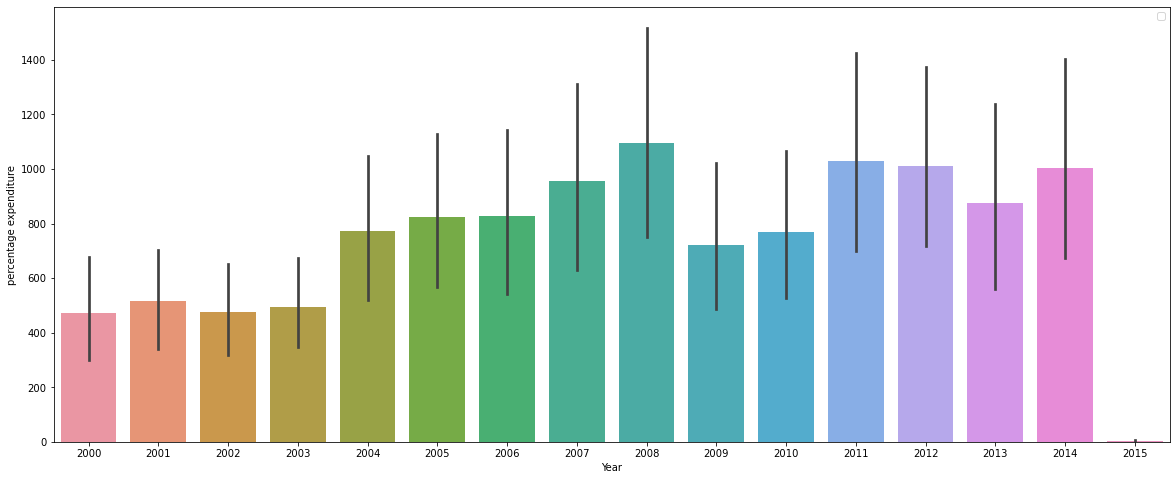

In [37]:
#Percentage expenditure yearly
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='percentage expenditure',data=df)
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [38]:
df['percentage expenditure'].describe()

count     2928.000000
mean       740.321185
std       1990.930605
min          0.000000
25%          4.853964
50%         65.611455
75%        442.614322
max      19479.911610
Name: percentage expenditure, dtype: float64

In [39]:
#Since the percentage expenditure cannot be more than 100 
df.loc[df['percentage expenditure'] > 100,'percentage expenditure'] = np.nan

<AxesSubplot:xlabel='Year', ylabel='Population'>

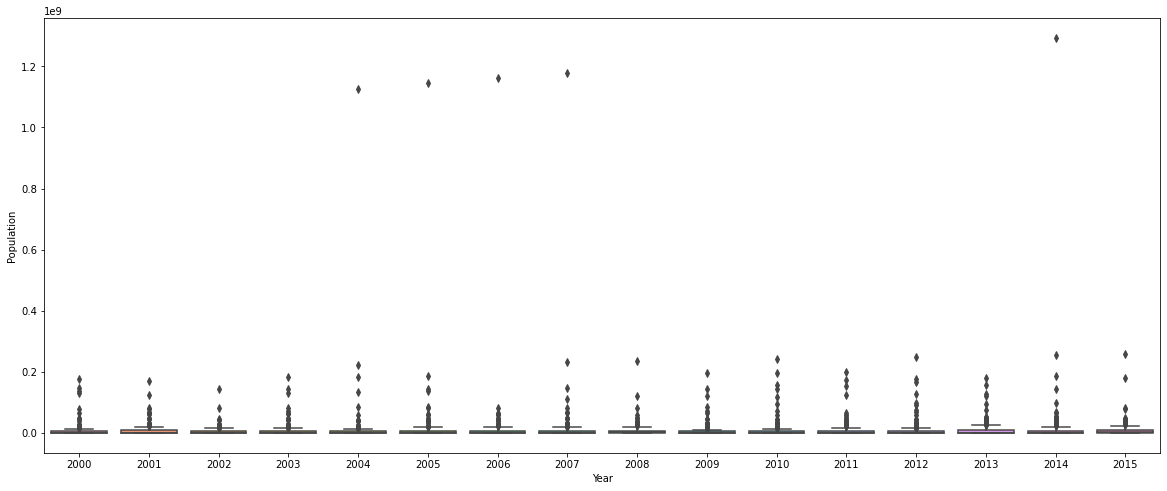

In [40]:
plt.figure(figsize=(20,8))
sns.boxplot(y='Population',x='Year',data=df)

To remove the outliers, 2 percentile of the data in the column Population is trumped by replacing it with null values.

In [41]:
Q1=df['Population'].quantile(0.02)
Q3=df['Population'].quantile(0.98)
df.loc[df['Population'] > Q3,'Population'] = np.nan
df.loc[df['Population'] < Q1,'Population'] = np.nan

<AxesSubplot:xlabel='Year', ylabel='Population'>

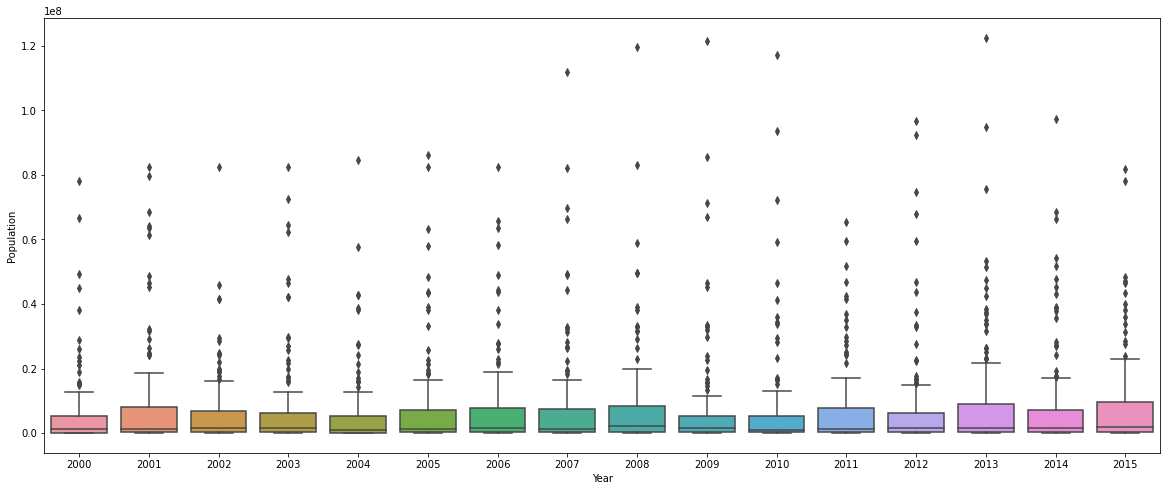

In [42]:
plt.figure(figsize=(20,8))
sns.boxplot(y='Population',x='Year',data=df)

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

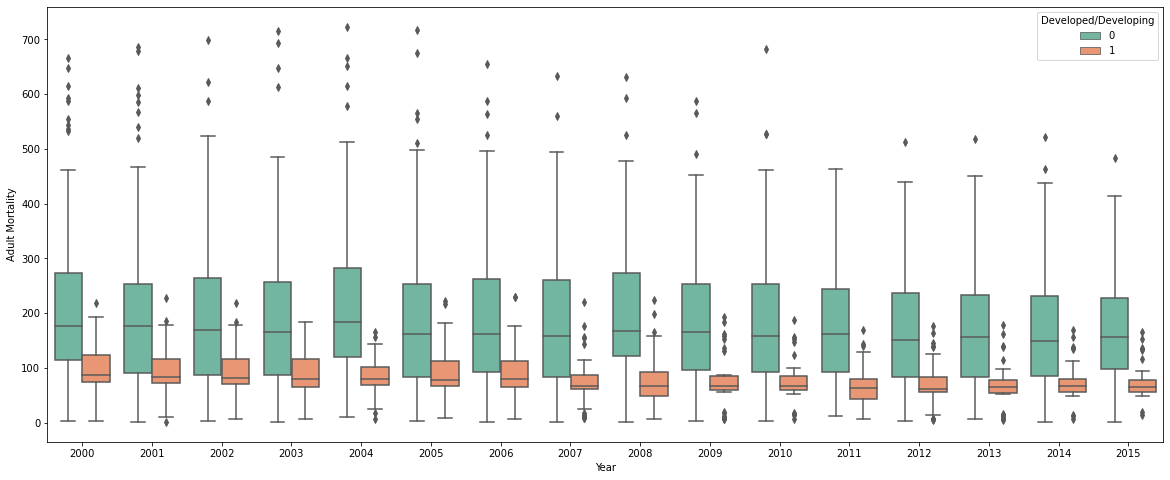

In [43]:
#Adult mortality yearly data
plt.figure(figsize=(20,8))
sns.boxplot(x='Year',y='Adult Mortality',data=df,hue='Developed/Developing',palette='Set2')

10 percentile of the data in Adult Mortality column is clipped to remove the outliers

In [44]:
Q1=df['Adult Mortality'].quantile(0.10)
Q3=df['Adult Mortality'].quantile(0.90)
df.loc[df['Adult Mortality'] > Q3] = np.nan
df.loc[df['Adult Mortality'] < Q1] = np.nan

<AxesSubplot:xlabel='Year', ylabel='Adult Mortality'>

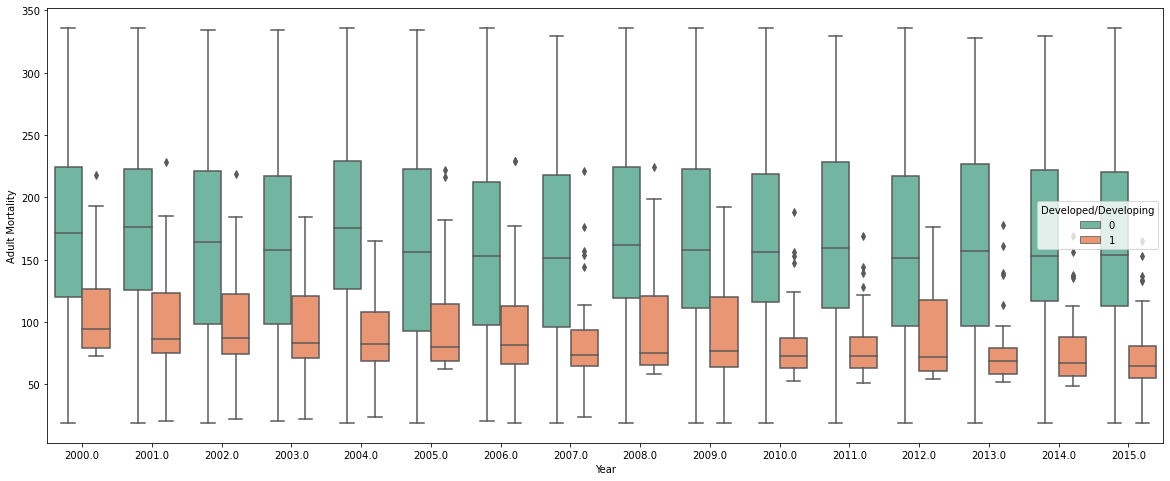

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Year',y='Adult Mortality',data=df,hue='Developed/Developing',palette='Set2')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.3% of the points

<AxesSubplot:xlabel='Year', ylabel='infant deaths'>

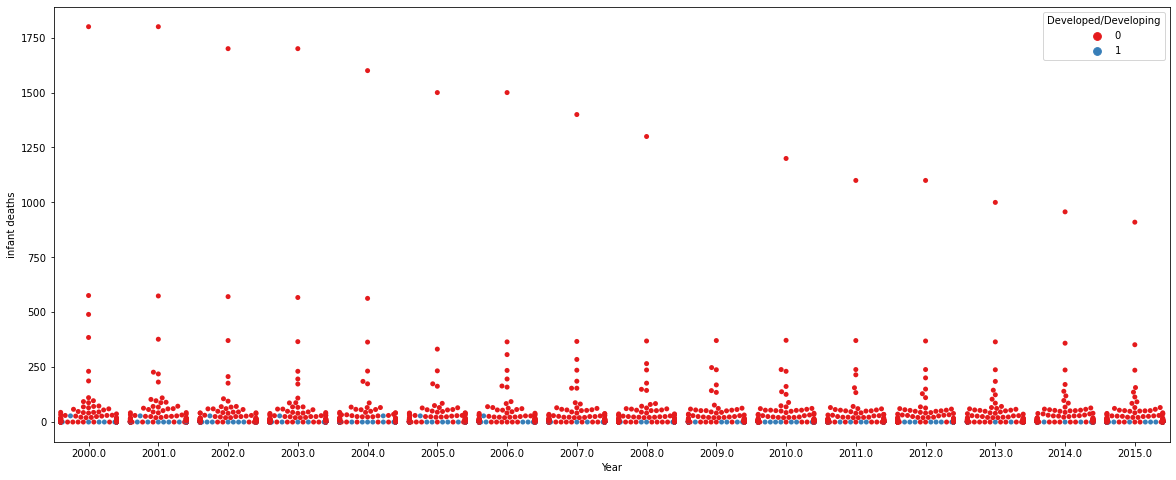

In [46]:
#Yealy infant deaths
plt.figure(figsize=(20,8))
sns.swarmplot(x='Year',y='infant deaths',data=df,hue='Developed/Developing',palette='Set1')

5 percentile data on both ends of the column is clipped and replaced with null values, to remove the outliers.

In [47]:
Q1=df['infant deaths'].quantile(0.05)
Q3=df['infant deaths'].quantile(0.95)
df.loc[df['infant deaths'] > Q3] = np.nan
df.loc[df['infant deaths'] < Q1] = np.nan

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 30.4% of the points

<AxesSubplot:xlabel='Year', ylabel='infant deaths'>

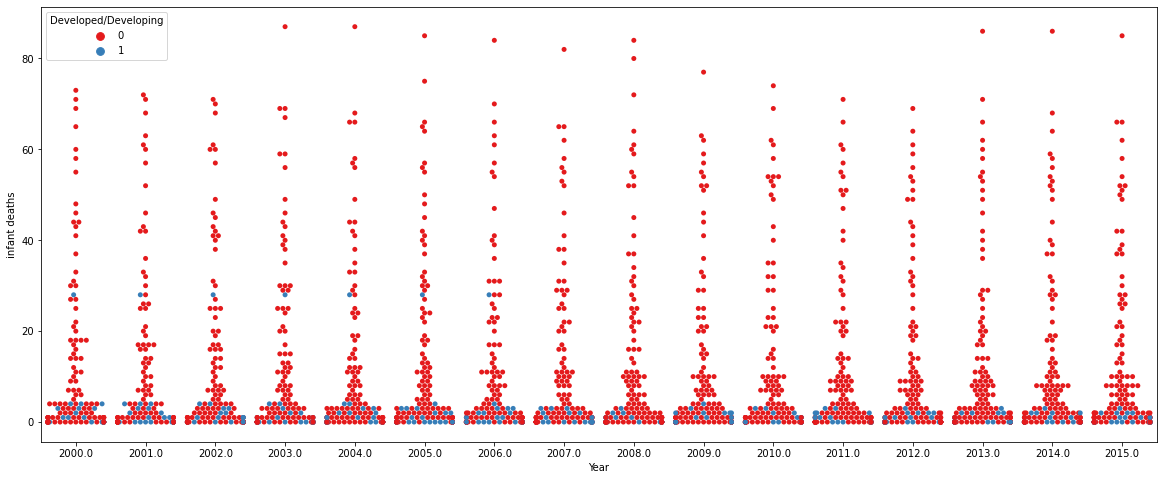

In [48]:
#Yealy infant deaths
plt.figure(figsize=(20,8))
sns.swarmplot(x='Year',y='infant deaths',data=df,hue='Developed/Developing',palette='Set1')

<AxesSubplot:xlabel='Year', ylabel='under-five deaths '>

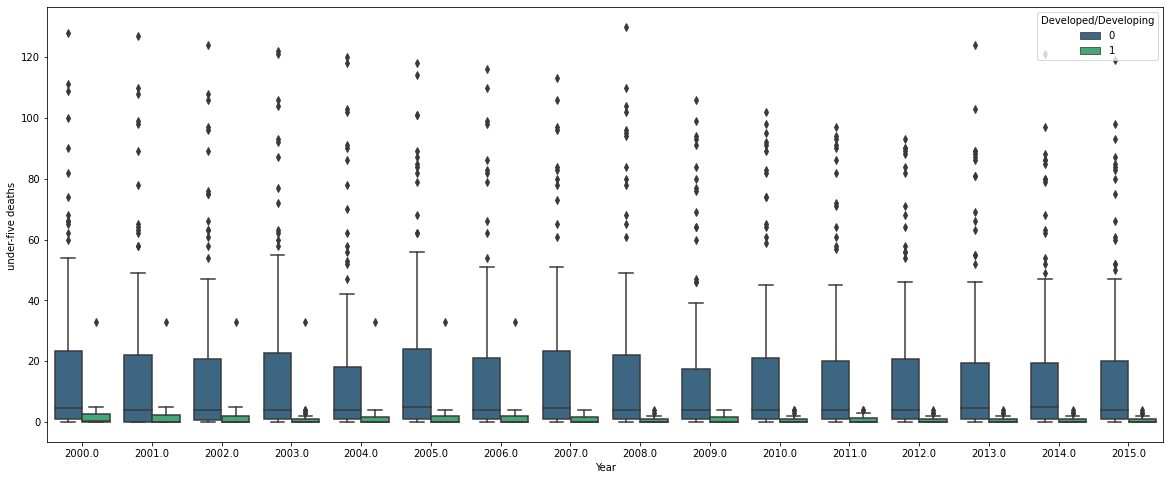

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Year',y='under-five deaths ',data=df,hue='Developed/Developing',palette='viridis')

15 percentile on both the ends are clipped to reduce the outliers.

In [50]:
Q1=df['under-five deaths '].quantile(0.15)
Q3=df['under-five deaths '].quantile(0.85)
df.loc[df['under-five deaths '] > Q3] = np.nan
df.loc[df['under-five deaths '] < Q1] = np.nan

<AxesSubplot:xlabel='Year', ylabel='under-five deaths '>

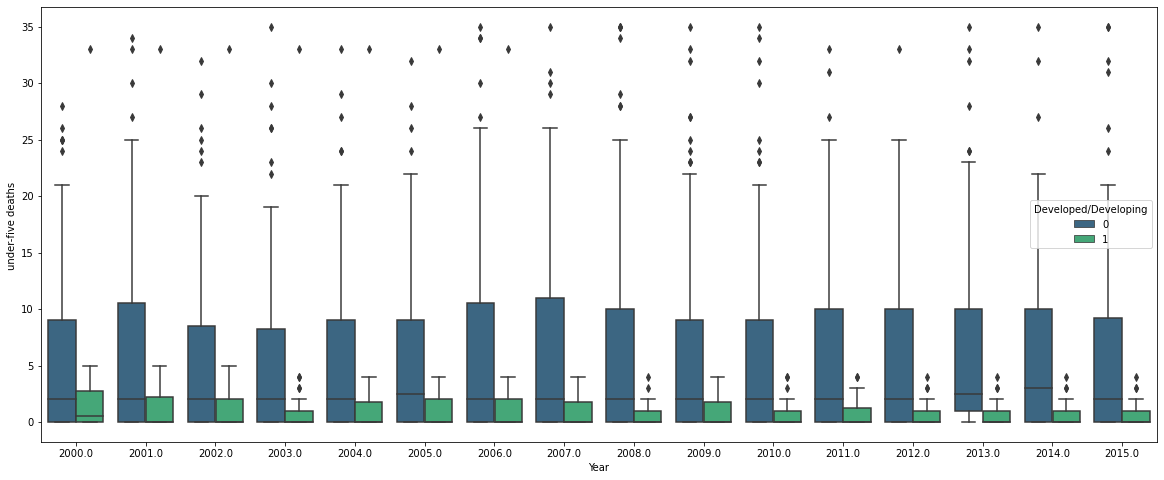

In [51]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Year',y='under-five deaths ',data=df,hue='Developed/Developing',palette='viridis')

## Visualizations

Now, lets perform some visualizations on the clean data

<AxesSubplot:ylabel='Country'>

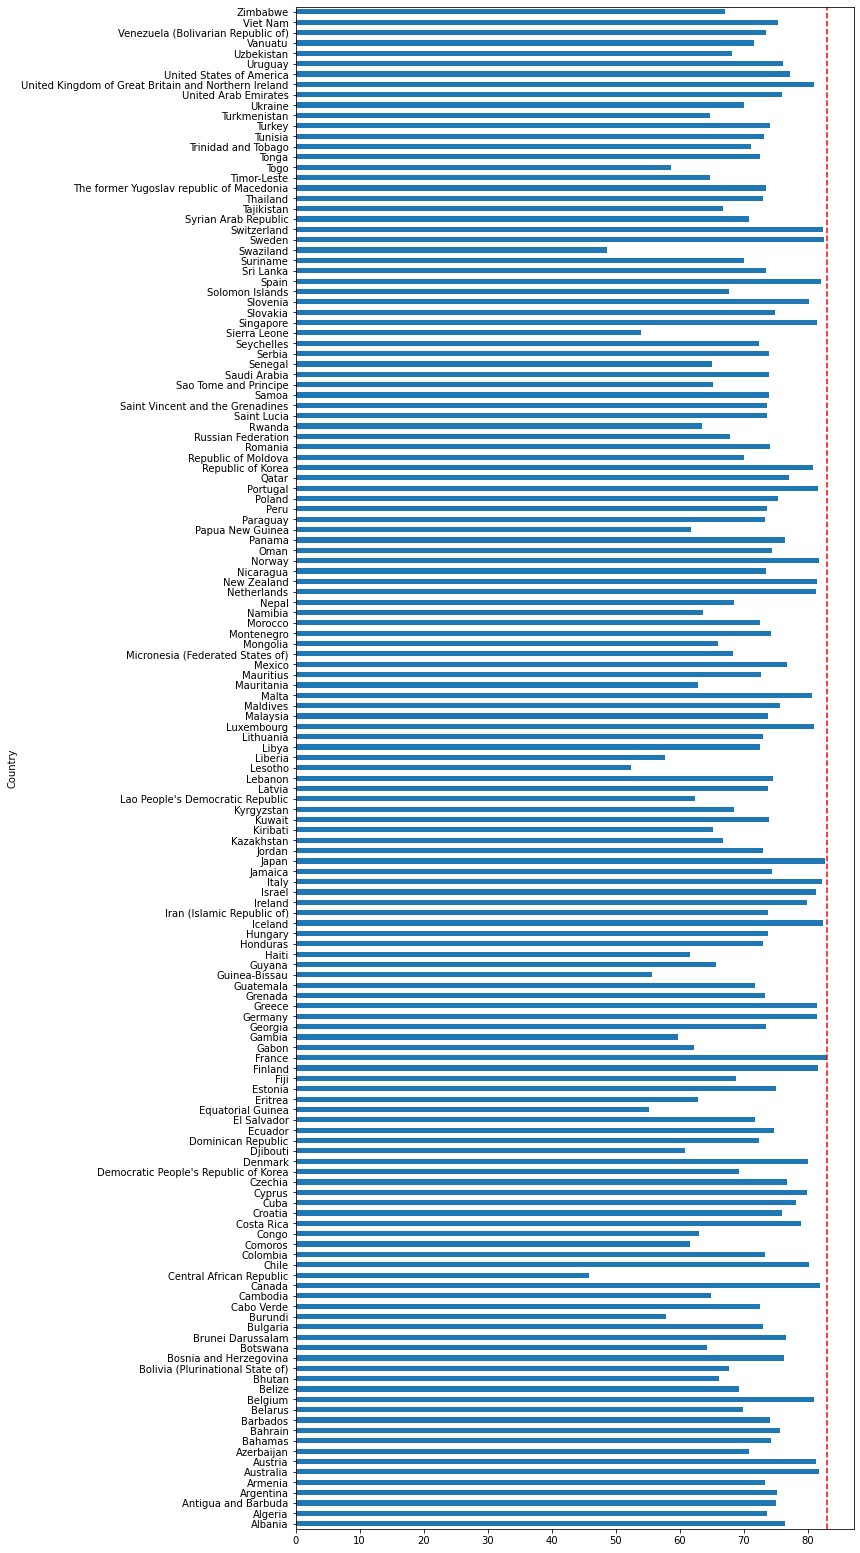

In [52]:
#Life Expectancies in the year 2015 across the countries 
ax=df.groupby('Country')['Life expectancy '].mean().plot(kind='barh',figsize=(10,28),x='Country',y='Life expectancy ')
m=df.groupby('Country')['Life expectancy '].mean().max()
ax.axvline(m,linestyle='--',color='red')
ax

<AxesSubplot:ylabel='Country'>

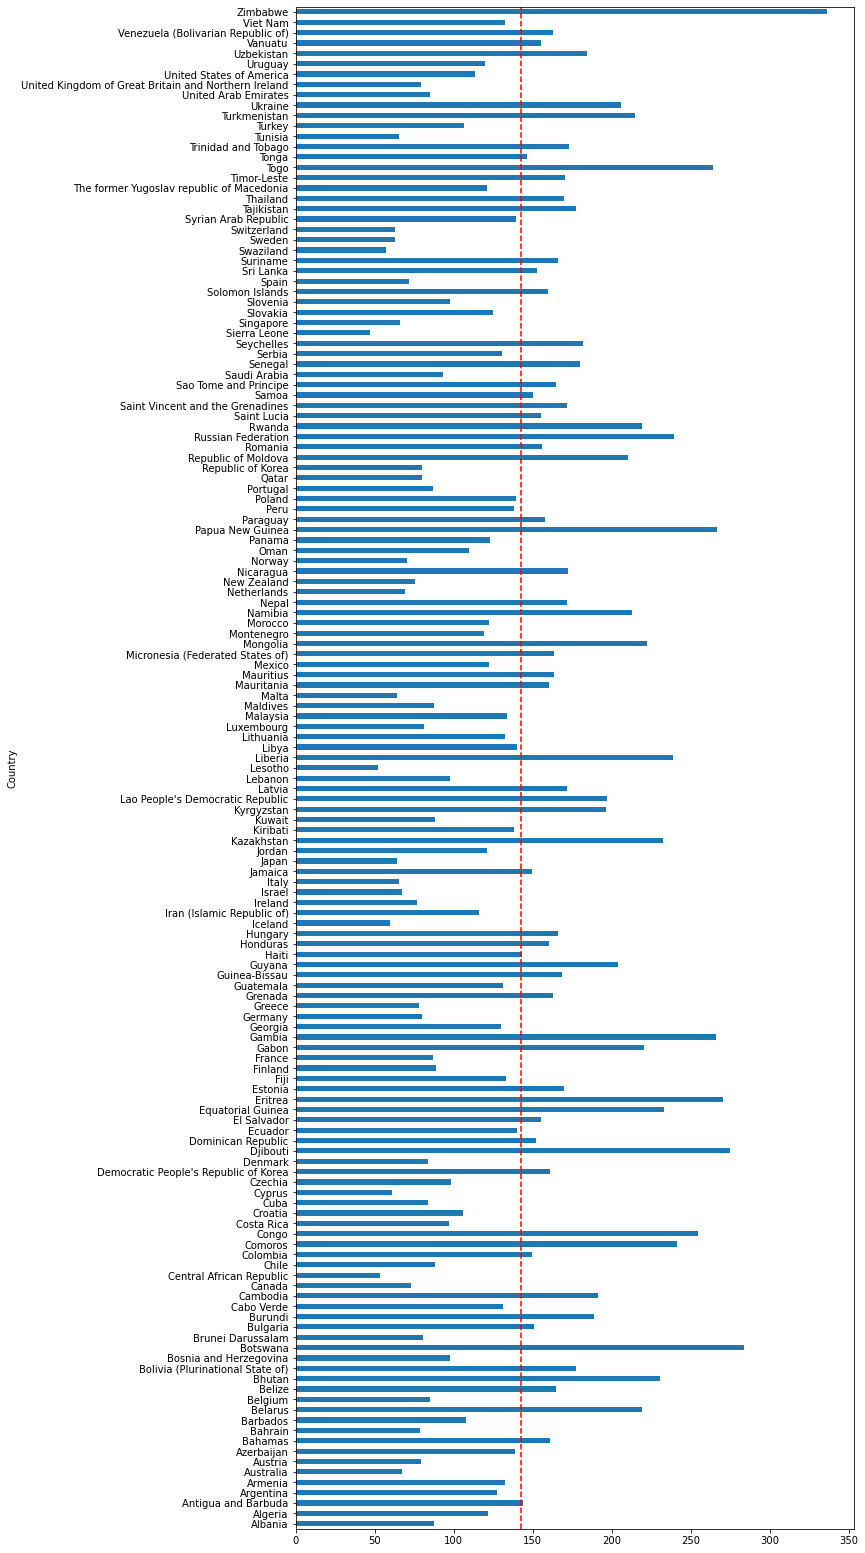

In [53]:
#Adult Mortality across the countries over the years  
ax=df.groupby('Country')['Adult Mortality'].mean().plot(kind='barh',figsize=(10,28),x='Country',y='Adult Mortality')
m=df['Adult Mortality'].mean()
ax.axvline(m,linestyle='--',color='red')
ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


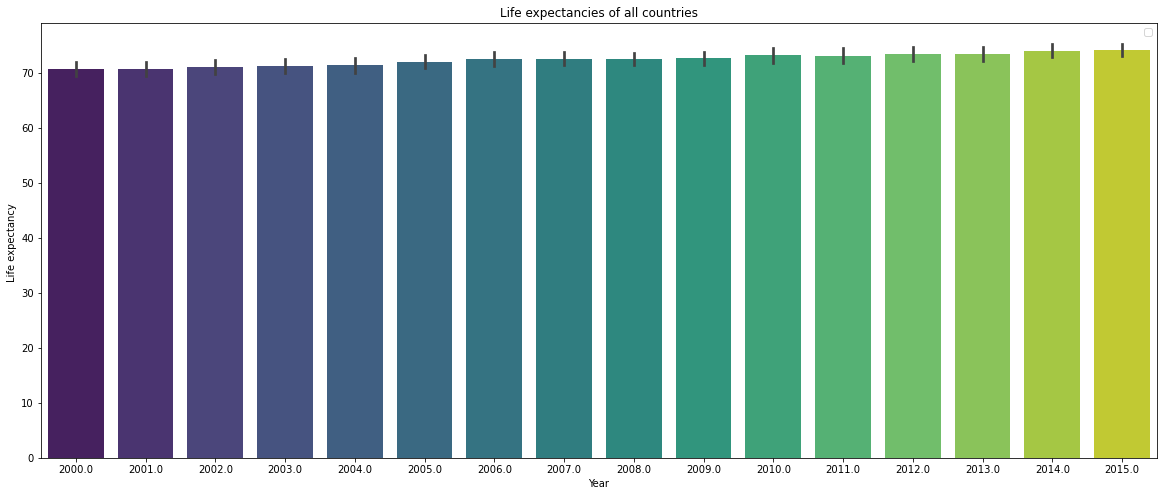

In [54]:
#Life expectancies over the years for all countries
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Life expectancy ',data=df,palette='viridis').set(title='Life expectancies of all countries')
plt.legend(bbox_to_anchor=(1.0, 1.0))

Let us analyze the data of a single country

In [55]:
gm=df[df['Country']=='Germany']
gm

Country    Year Developed/Developing  Life expectancy   Adult Mortality  \
994   Germany  2015.0                    1              81.0             68.0   
995   Germany  2014.0                    1              89.0             69.0   
996   Germany  2013.0                    1              86.0             71.0   
997   Germany  2012.0                    1              86.0             71.0   
998   Germany  2011.0                    1              85.0             74.0   
999   Germany  2010.0                    1              81.0             76.0   
1000  Germany  2009.0                    1              80.0             79.0   
1002  Germany  2007.0                    1              79.8             82.0   
1003  Germany  2006.0                    1              79.6             84.0   
1004  Germany  2005.0                    1              79.2             85.0   
1005  Germany  2004.0                    1              79.1             86.0   
1007  Germany  2002.0                    1              78.4             91.0   
1008  Germany  2001.0                    1              78.3             92.0   
1009  Germany  2000.0                    1              78.0             95.0   

      infant deaths    Alcohol  percentage expenditure  Hepatitis B  Measles   \
994             2.0  11.628667                     0.0         88.0    2464.0   
995             2.0  11.030000                     NaN         88.0     443.0   
996             2.0  10.940000                     NaN         88.0    1771.0   
997             2.0  11.180000                     NaN         88.0     166.0   
998             2.0  11.200000                     NaN         88.0    1607.0   
999             2.0  11.200000                     NaN         88.0     780.0   
1000            2.0  11.220000                     NaN         88.0     574.0   
1002            3.0  11.500000                     NaN         86.0     567.0   
1003            3.0  11.760000                     NaN         87.0    2307.0   
1004            3.0  11.670000                     NaN          9.0     778.0   
1005            3.0  11.830000                     NaN         88.0     121.0   
1007            3.0  12.250000                     NaN         87.0    4657.0   
1008            3.0  12.460000                     NaN         86.0    6024.0   
1009            3.0  12.910000                     NaN         84.0       0.0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS          GDP  \
994   ...   94.0           4.073333         95.0        0.1  41176.88158   
995   ...   94.0          11.300000         95.0        0.1   4792.65288   
996   ...   94.0          11.160000         95.0        0.1   4653.91143   
997   ...   94.0           1.990000         95.0        0.1   4465.24891   
998   ...   94.0           1.930000         95.0        0.1   4681.32796   
999   ...   94.0          11.250000         95.0        0.1  41785.55691   
1000  ...   95.0          11.400000         96.0        0.1  41732.77250   
1002  ...   95.0           1.180000         96.0        0.1  41814.81910   
1003  ...   94.0           1.340000         96.0        0.1  36447.87232   
1004  ...   95.0           1.520000         96.0        0.1  34696.62920   
1005  ...   96.0           1.370000         96.0        0.1  34165.93430   
1007  ...   97.0           1.400000         93.0        0.1   2525.16445   
1008  ...   96.0           1.150000         93.0        0.1  23687.31689   
1009  ...   94.0           1.100000          9.0        0.1  23718.74670   

      Population   thinness  1-19 years   thinness 5-9 years  \
994   81686611.0                    1.1                  1.1   
995      89825.0                    1.1                  1.1   
996     864565.0                    1.1                  1.1   
997    8425823.0                    1.1                  1.1   
998    8274983.0                    1.1                  1.1   
999    8177693.0                    1.1          

In [56]:
plt.figure(figsize=(10,5))
px.line(gm,x='Income composition of resources',y='Life expectancy ', title='Relation between Income composition and life expectancy')

<Figure size 720x360 with 0 Axes>

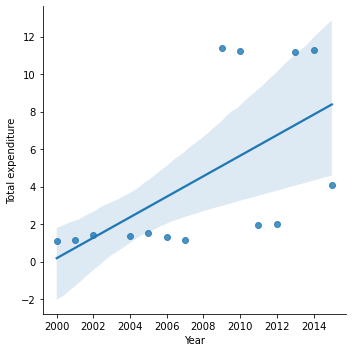

In [57]:
sns.lmplot(x='Year',y='Total expenditure',data=gm)

Text(0.5, 1.0, 'Alcohol consumption stats')

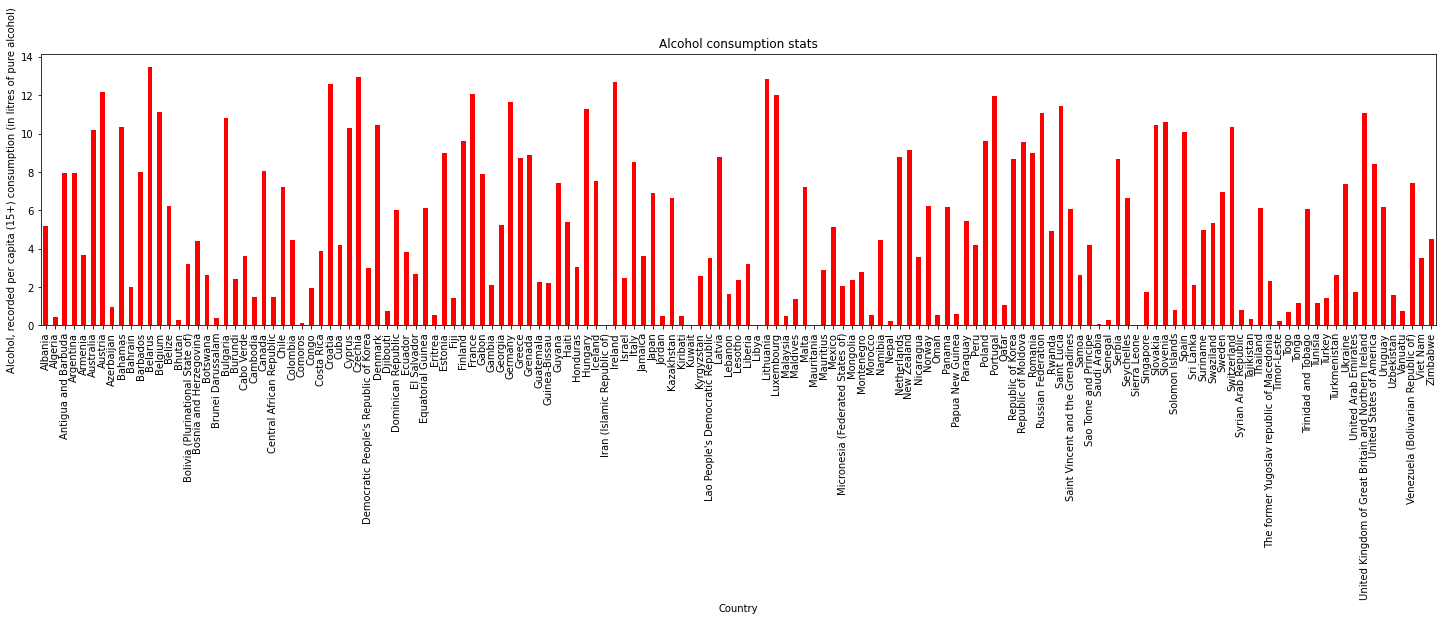

In [58]:
plt.figure(figsize=(25,5))
ax=df.groupby(['Country']).Alcohol.mean().plot(kind='bar',color='red')
ax.set_ylabel('Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)')
ax.set_title('Alcohol consumption stats')

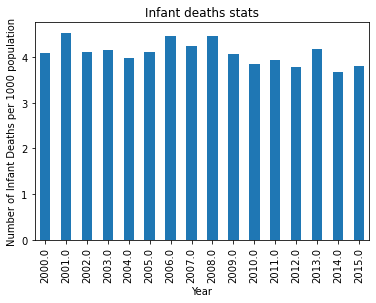

In [59]:
ax=df.groupby('Year')['infant deaths'].mean().plot(kind='bar')
ax.set_ylabel('Number of Infant Deaths per 1000 population')
ax.set_title('Infant deaths stats')
plt.show()

In [60]:
#data in the year 2013
df13=df[df['Year']==2013]
df13

Country    Year Developed/Developing  \
18                               Albania  2013.0                    0   
34                               Algeria  2013.0                    0   
66                   Antigua and Barbuda  2013.0                    0   
82                             Argentina  2013.0                    0   
98                               Armenia  2013.0                    0   
...                                  ...     ...                  ...   
2812                             Uruguay  2013.0                    0   
2828                          Uzbekistan  2013.0                    0   
2844                             Vanuatu  2013.0                    0   
2860  Venezuela (Bolivarian Republic of)  2013.0                    0   
2876                            Viet Nam  2013.0                    0   

      Life expectancy   Adult Mortality  infant deaths  Alcohol  \
18                77.2             84.0            0.0     4.76   
34                75.3            112.0           21.0     0.53   
66                76.1            133.0            0.0     8.58   
82                76.0            119.0            8.0     8.28   
98                74.4            123.0            1.0     3.79   
...                ...              ...            ...      ...   
2812              76.8            117.0            0.0     5.82   
2828              69.1            185.0           17.0     0.01   
2844              71.6            135.0            0.0     0.01   
2860              73.8            159.0            9.0     6.71   
2876              75.7            129.0           28.0     4.00   

      percentage expenditure  Hepatitis B  Measles   ...  Polio  \
18                       NaN         99.0       0.0  ...   99.0   
34                       NaN         95.0      25.0  ...   95.0   
66                       NaN         99.0       0.0  ...   98.0   
82                       NaN         94.0       0.0  ...   99.0   
98                       NaN         95.0      10.0  ...   96.0   
...                      ...          ...       ...  ...    ...   
2812                     NaN         94.0       0.0  ...   94.0   
2828                19.16247         99.0       0.0  ...   99.0   
2844                     NaN         64.0       0.0  ...   65.0   
2860                 0.00000         82.0       0.0  ...   82.0   
2876                 0.00000         59.0    1123.0  ...   93.0   

      Total expenditure  Diphtheria    HIV/AIDS           GDP  Population  \
18                 5.66         99.0        0.1   4414.723140    289592.0   
34                 7.12         95.0        0.1   5471.866766  38338562.0   
66                 5.33         99.0        0.2  12224.864160         NaN   
82                 4.99         94.0        0.1  12976.636420  42539925.0   
98                 4.55         95.0        0.1   3843.591213    289359.0   
...                 ...          ...        ...           ...         ...   
2812               8.68         94.0        0.1  16881.256800      3485.0   
2828               6.32         99.0        0.1    197.551233     32432.0   
2844               3.92         64.0        0.1   3167.343560    253142.0   
2860               4.94         82.0        0.1           NaN         NaN   
2876               7.17         59.0        0.1           NaN         NaN   

       thinness  1-19 years   thinness 5-9 years  \
18                      1.3                  1.4   
34                      5.9                  5.8   
66                      3.3                  3.3   
82                      1.0                  0.9   
98                      2.1                  2.1   
...                     ...                  ...   
2812                    1.5                  1.4   
2828                    3.0                  3.1   
2844                    1.5                  1.4   
2860                    1.6                  1.5   
2876                   14.3                 14.9 

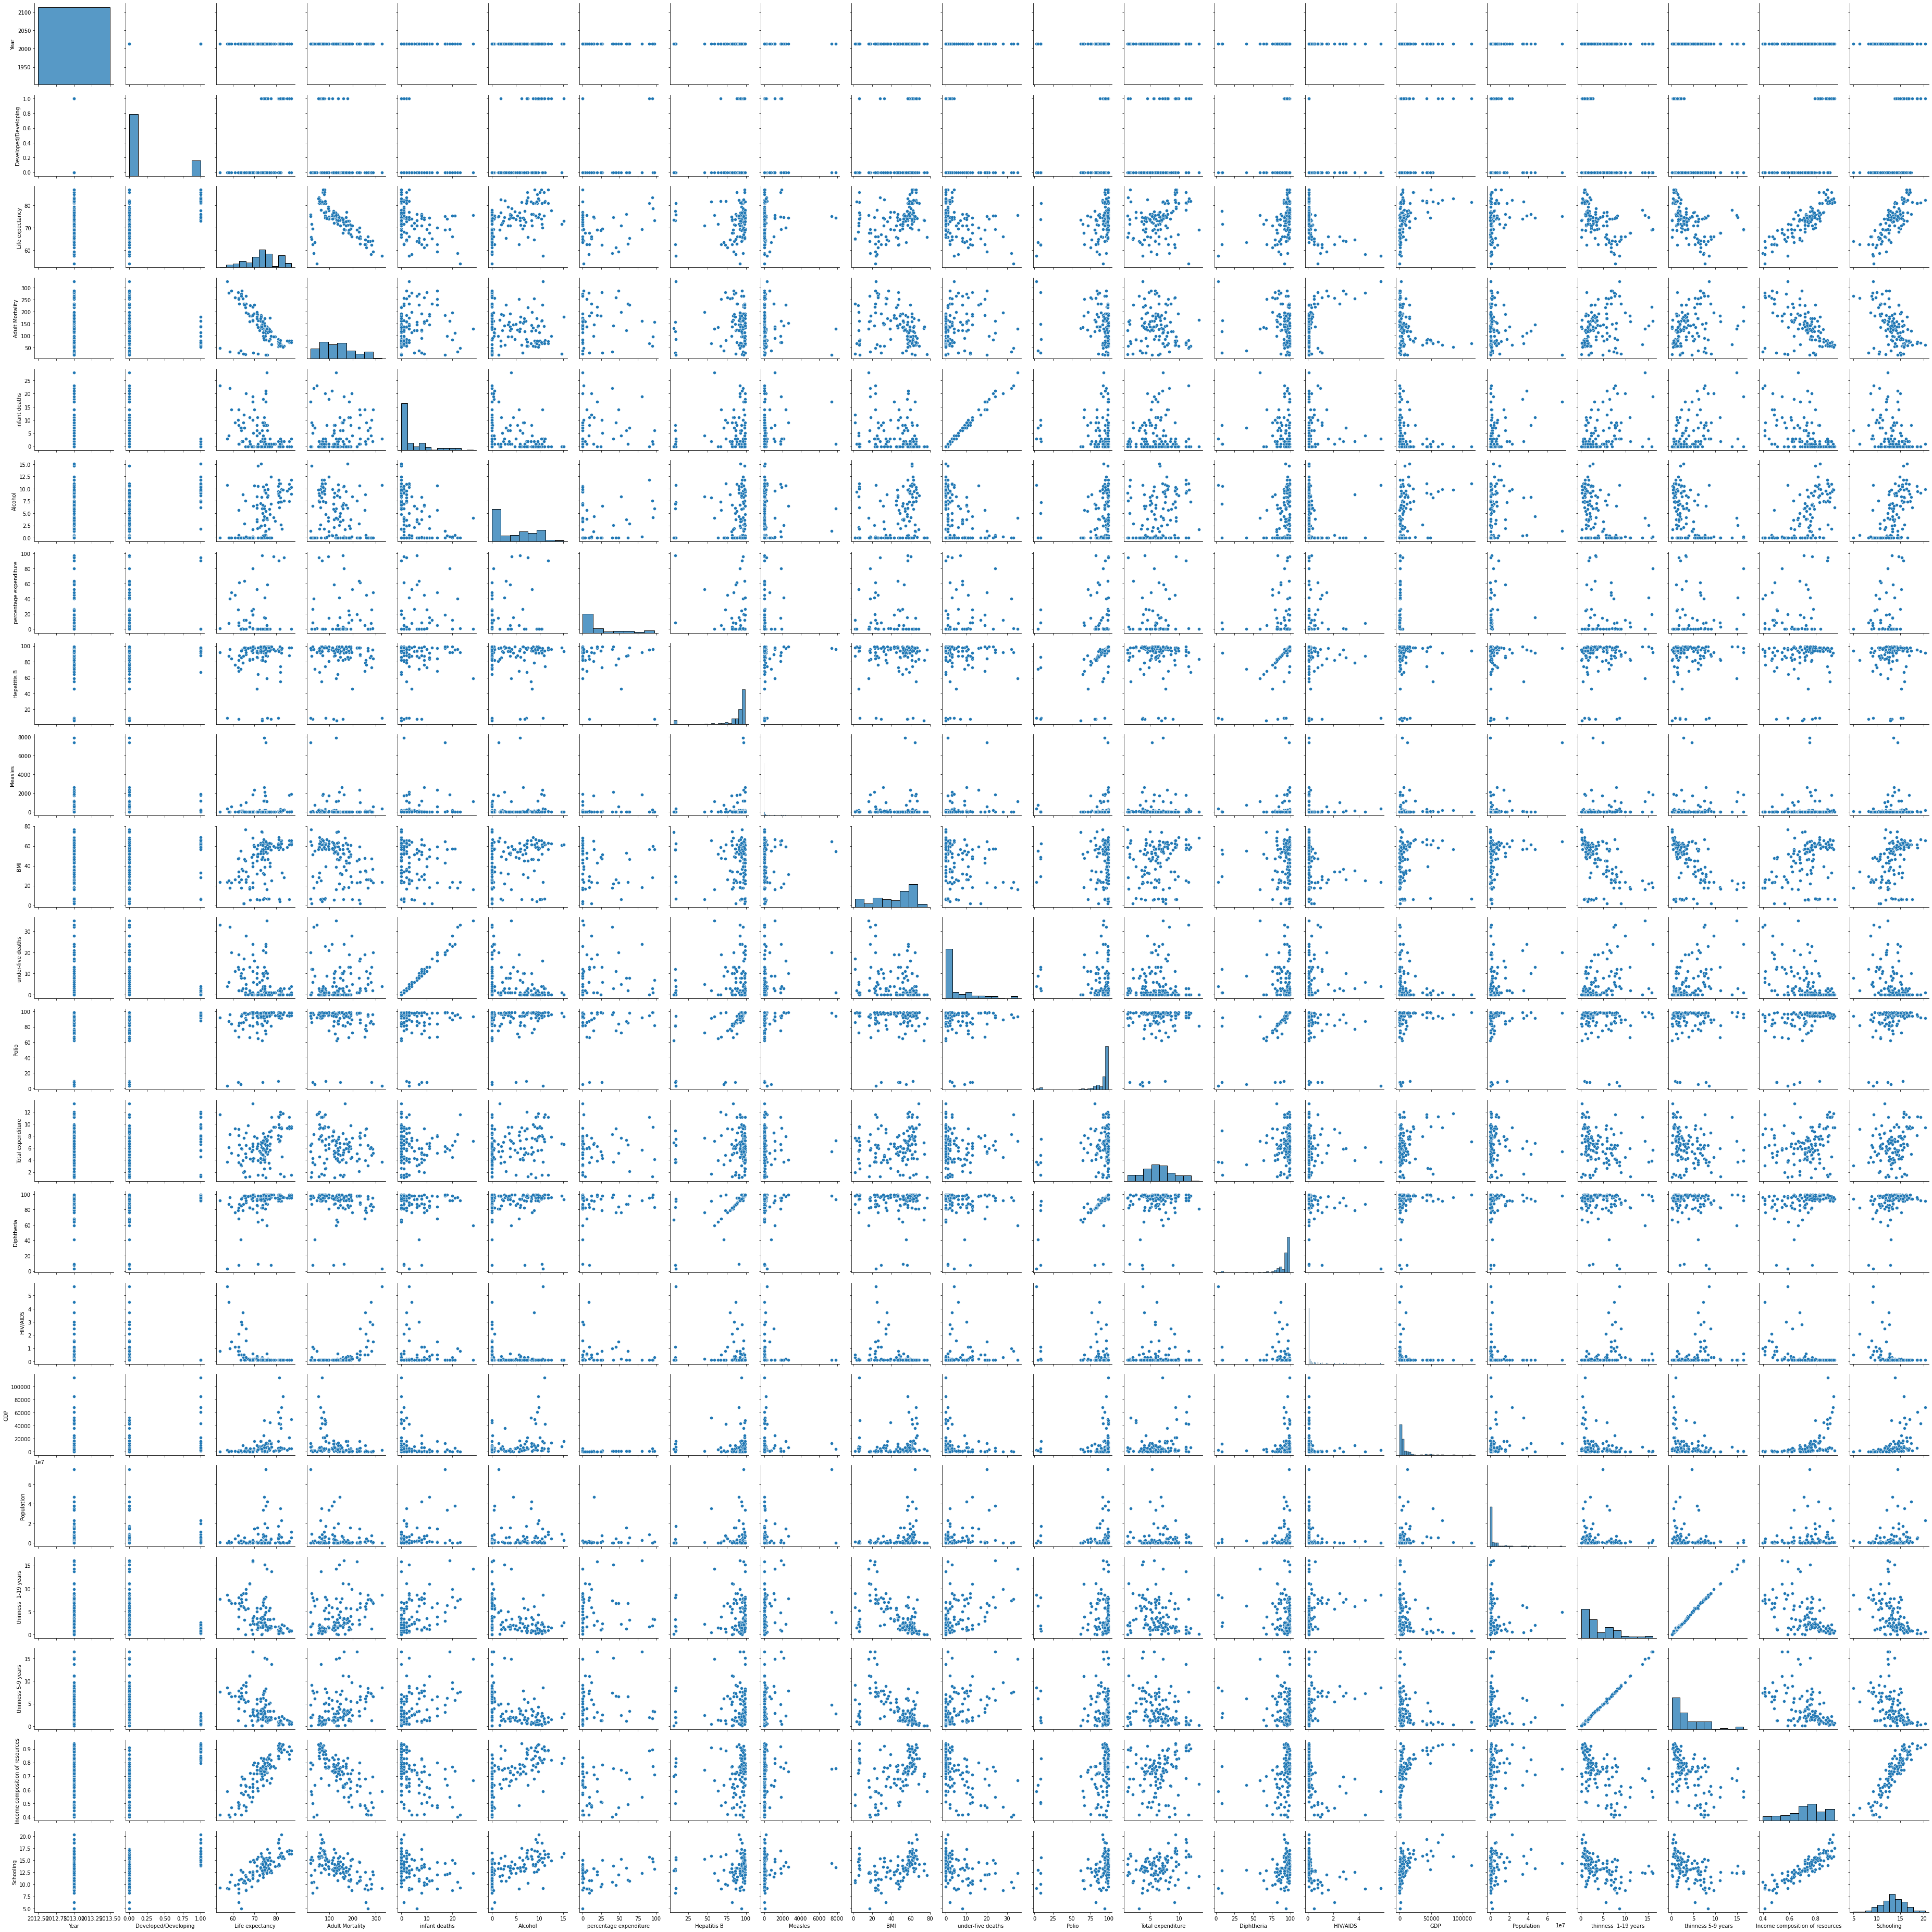

In [61]:
sns.pairplot(df13)

The above pairplot shows visualized correlation between all the columns of the dataset 

<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

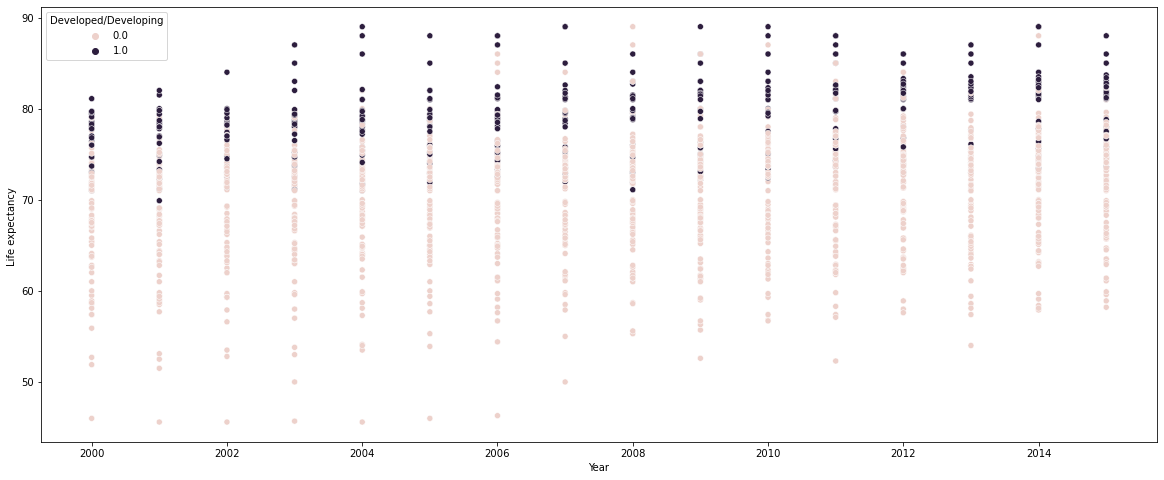

In [62]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Year',y='Life expectancy ',data=df,hue='Developed/Developing')

As we can see the Life expectancy in Developed nations is higher than thos in the Developing nations

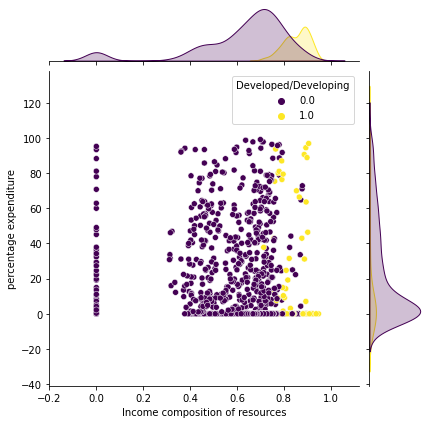

In [63]:
#Jointplot between Income composition and percentage expenditure
sns.jointplot(x='Income composition of resources',y='percentage expenditure',data=df,hue='Developed/Developing',palette='viridis')

Income composition of resources is relatively greater for Developed countries

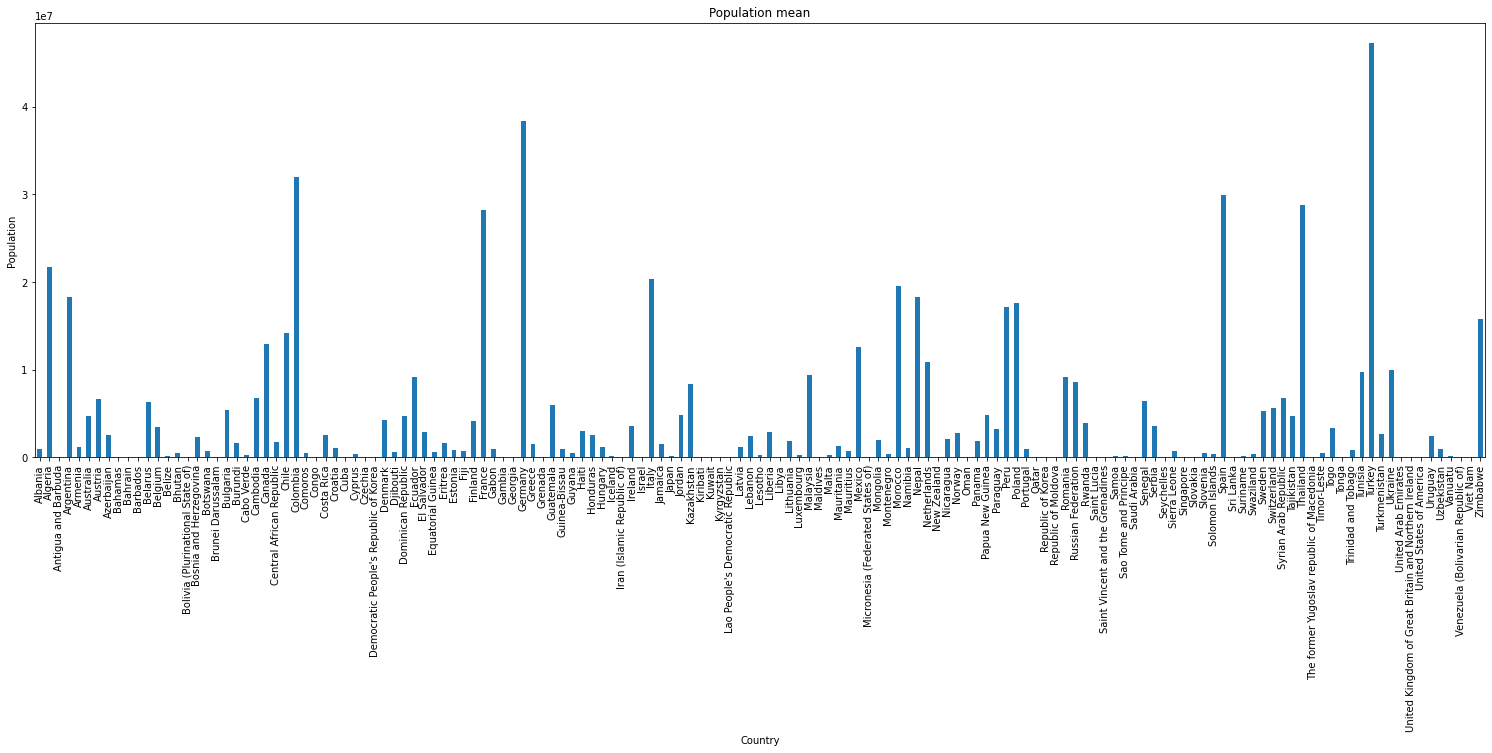

In [64]:
#Plotting mean of the population over the years in each country
plt.figure(figsize=(26,8))
ax=df.groupby('Country')['Population'].mean().plot(kind='bar')
ax.set_ylabel('Population')
ax.set_title('Population mean')
plt.show()

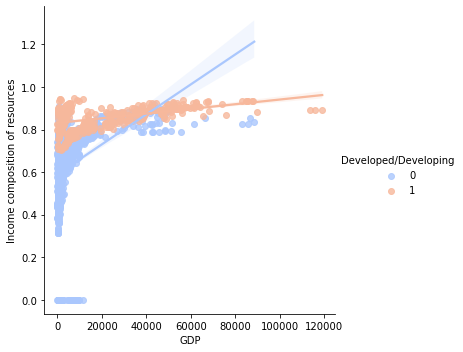

In [65]:
#linearplot 
sns.lmplot(x='GDP',y='Income composition of resources',data=df,hue='Developed/Developing',palette='coolwarm')

Sort of linear relation between GDP and Income composition of resources

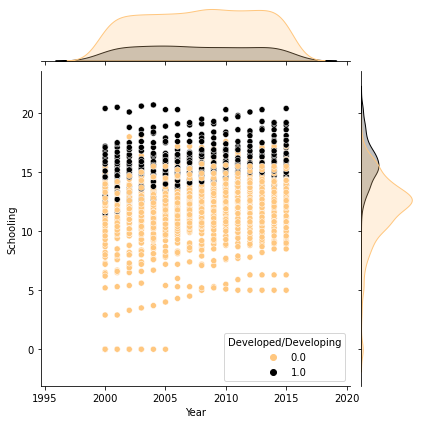

In [66]:
sns.jointplot(x='Year',y='Schooling',data=df,hue='Developed/Developing',palette='copper_r')

Schooling is high mostly in Developed countries

## Correlation

In [67]:
df.corr()

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.151194        -0.085594   
Life expectancy                  0.151194          1.000000        -0.591534   
Adult Mortality                 -0.085594         -0.591534         1.000000   
infant deaths                   -0.022894         -0.339927         0.194193   
Alcohol                         -0.066828          0.431113        -0.196187   
percentage expenditure          -0.236784         -0.115725         0.032954   
Hepatitis B                      0.135936          0.167770        -0.073990   
Measles                         -0.078647         -0.030940         0.042658   
 BMI                             0.074338          0.414124        -0.272010   
under-five deaths               -0.019742         -0.382866         0.209205   
Polio                            0.082160          0.328108        -0.140439   
Total expenditure                0.066672          0.260617        -0.170433   
Diphtheria                       0.112787          0.340690        -0.146752   
 HIV/AIDS                       -0.060676         -0.431643         0.074586   
GDP                              0.097323          0.481841        -0.360015   
Population                       0.036509          0.175834        -0.111228   
 thinness  1-19 years            0.022335         -0.440331         0.270311   
 thinness 5-9 years              0.024394         -0.441815         0.275745   
Income composition of resources  0.233347          0.677537        -0.449781   
Schooling                        0.197327          0.721195        -0.454079   

                                 infant deaths   Alcohol  \
Year                                 -0.022894 -0.066828   
Life expectancy                      -0.339927  0.431113   
Adult Mortality                       0.194193 -0.196187   
infant deaths                         1.000000 -0.286016   
Alcohol                              -0.286016  1.000000   
percentage expenditure               -0.000737 -0.151952   
Hepatitis B                          -0.078445  0.028699   
Measles                               0.147005  0.004407   
 BMI                                 -0.214376  0.261437   
under-five deaths                     0.992224 -0.291598   
Polio                                -0.129474  0.151159   
Total expenditure                    -0.055908  0.270465   
Diphtheria                           -0.104369  0.149321   
 HIV/AIDS                             0.070677 -0.046898   
GDP                                  -0.253311  0.312920   
Population                            0.264855  0.105823   
 thinness  1-19 years                 0.260754 -0.443036   
 thinness 5-9 years                   0.263293 -0.437033   
Income composition of resources      -0.225279  0.427502   
Schooling                            -0.312602  0.527195   

                                 percentage expenditure  Hepatitis B  \
Year                                          -0.236784     0.135936   
Life expectancy                               -0.115725     0.167770   
Adult Mortality                                0.032954    -0.073990   
infant deaths                                 -0.000737    -0.078445   
Alcohol                                       -0.151952     0.028699   
percentage expenditure                         1.000000    -0.096431   
Hepatitis B                                   -0.096431     1.000000   
Measles                                        0.023948    -0.031930   
 BMI                                          -0.071184     0.049052   
under-five deaths                             -0.001114    -0.090179   
Polio                                         -0.043938     0.472479   
Total expenditure                             -0.106707     0.034262   
Diphtheria                                    -0.021655     0.552036   
 HIV/AIDS                                      0.094305    -0.102344   
GDP            

<AxesSubplot:>

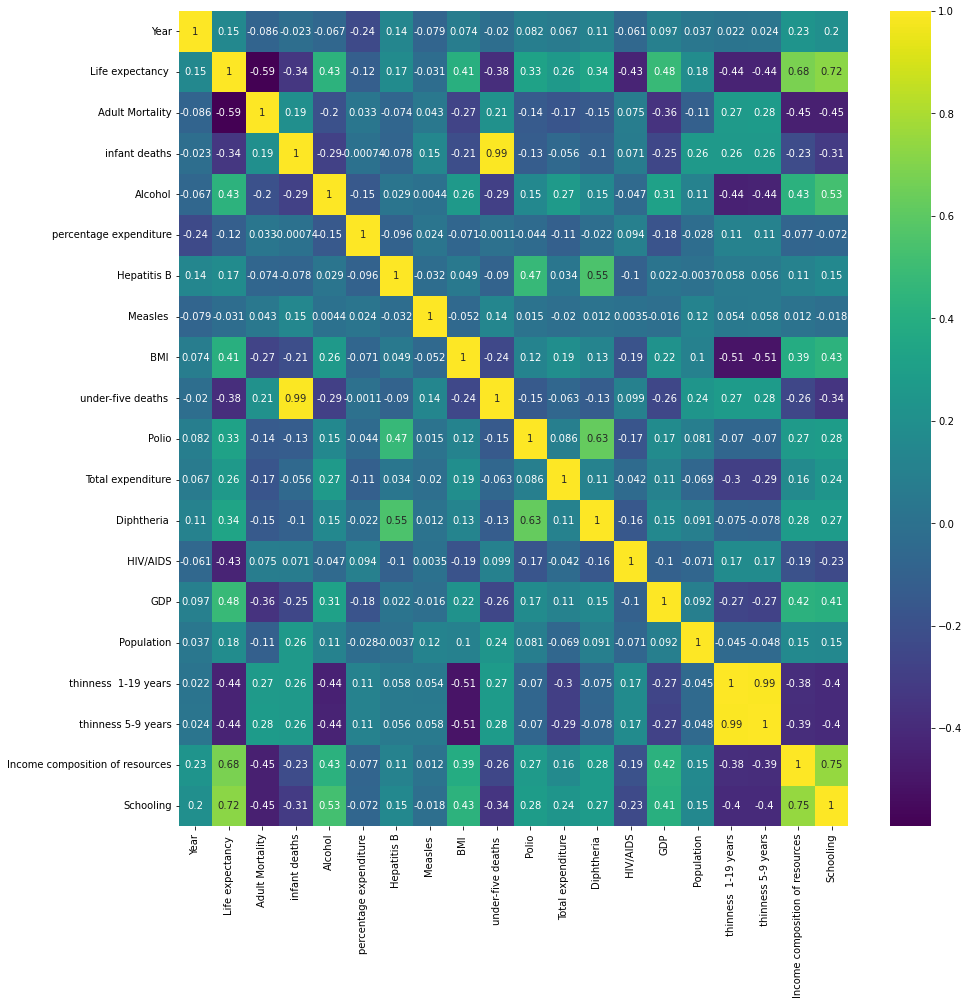

In [68]:
#Visualizations of the correlation between columns
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## Linear Regression Model

The given data can be trained and fit into a simple linear regression model.

In [69]:
df.fillna(0,inplace=True)

In [70]:
x=pd.DataFrame(df[['Developed/Developing','Population',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Income composition of resources', 'Schooling']])  
y=pd.DataFrame(df['Life expectancy '])

In [71]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [72]:
x_train.shape

(2049, 17)

In [73]:
y_train.shape

(2049, 1)

In [74]:
x_test.shape

(879, 17)

In [75]:
y_test.shape

(879, 1)

In [76]:
lm=LinearRegression()

In [77]:
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred=lm.predict(x_test)

In [79]:
y_pred

array([[73.01312216],
       [ 2.26230977],
       [ 2.26230977],
       [68.82647376],
       [80.06491259],
       [78.41001698],
       [ 2.26230977],
       [44.31289743],
       [77.16365131],
       [74.33081142],
       [77.84806466],
       [74.97121708],
       [76.47963684],
       [74.06486979],
       [74.63301368],
       [68.0253299 ],
       [ 2.26230977],
       [57.67686196],
       [ 2.26230977],
       [ 2.26230977],
       [ 2.26230977],
       [ 2.26230977],
       [80.62300857],
       [ 2.26230977],
       [73.88499715],
       [ 2.26230977],
       [ 2.26230977],
       [73.74291488],
       [54.9503653 ],
       [ 2.26230977],
       [78.15673238],
       [82.31111446],
       [79.84498421],
       [ 2.26230977],
       [ 2.26230977],
       [46.81505938],
       [ 2.26230977],
       [ 2.26230977],
       [76.69486663],
       [79.26133054],
       [ 2.26230977],
       [69.05651233],
       [63.00093462],
       [ 2.26230977],
       [84.60596799],
       [ 2

In [80]:
#computing the root mean square value
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [81]:
rmse

7.74439702837749

In [82]:
#error as a percentage of the original data
(rmse/y_test.mean())*100

Life expectancy     16.427775
dtype: float64

An error of around 16.42% is a pretty good training and testing model and hence the given linear regression model can predict Life expectancy with a good amount of accuracy 

## Logistic Regression

Test and train the data to fit a simple logistic regression model

In [83]:
x=pd.DataFrame(df[['Life expectancy ',
       'Adult Mortality', 'infant deaths','Population', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Income composition of resources', 'Schooling']]) 
y=pd.DataFrame(df['Developed/Developing'])

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [85]:
x_train.shape

(1961, 17)

In [86]:
y_train.shape

(1961, 1)

In [87]:
x_test.shape

(967, 17)

In [88]:
y_test.shape

(967, 1)

In [89]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [90]:
y_pred=logmodel.predict(x_test)

In [91]:
confusion_matrix(y_test,y_pred)

array([[790,  43],
       [ 72,  62]])

In [92]:
accuracy_score(y_test,y_pred)

0.8810754912099276

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       833
           1       0.59      0.46      0.52       134

    accuracy                           0.88       967
   macro avg       0.75      0.71      0.73       967
weighted avg       0.87      0.88      0.87       967



As all the measures of accuracy are good enough, the logistic regression model can be used to predict the development of a country, using this logistic regression model

## Observations

- The highest correlation with Life expectancy exists with Schooling in a Country
- The health conditions in Developed countries are better than that of the Developing country
- The maximum Life Expectancy with less Adult mortality and less infant deaths, existed in Sweden in 2007
- Life expectancy mean over the years by each country has a maximum in France
- Maximum Adult mortality mean over the years by each country occurs in Zimbabwe
- Belarus has the highest Alcohol consmption


# Conclusion

All the factors given aid to the Life expectancy of a country in some way based on the data in correlation, also gives an overview of the health conditions in each country based on financial status of the country, Adult Mortality, infant deatha and various other factors. The Exploratory data analysis for the given data of Life expectancy analytics is performed along with fitting the data into suitable regression models to predict desired outputs. 